# Importing Libraries and Files

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from pybaseball import pitching_stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import ModelSpec as MS, summarize, poly

In [4]:
pitchers_data = pd.read_csv('Pitchers_Data.csv')
pitchers_data.head()

,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,Location+
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,90.4,79.3,86.9,111
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,92.3,78.5,86.3,100
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,85.6,104
3,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,99
4,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,100


# Model 7: Fastball Velocity and Location
* Examining the impact that location has on expected velocity alongside fastball velocity

In [5]:
location_fb_df = pitchers_data[['FBv', 'Location+', 'xERA']]
x7 = MS(location_fb_df[['FBv','Location+']]).fit_transform(location_fb_df)
y7 = location_fb_df[['xERA']]
model7 = sm.OLS(y7, x7)
results7 = model7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     11.12
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           8.81e-05
Time:                        11:18:36   Log-Likelihood:                -41.097
No. Observations:                  58   AIC:                             88.19
Df Residuals:                      55   BIC:                             94.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.8253      3.796      5.750      0.000      14.218      29.433
FBv           -0.1592      0.038     -4.184      0.000      -0.235      -0.083
Location+     -0.0287      0.016     -1.849      0.070      -0.060       0.002
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.841
Skew:                           0.200   Prob(JB):                        0.657
Kurtosis:                       2.566   Cond. No.                     7.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

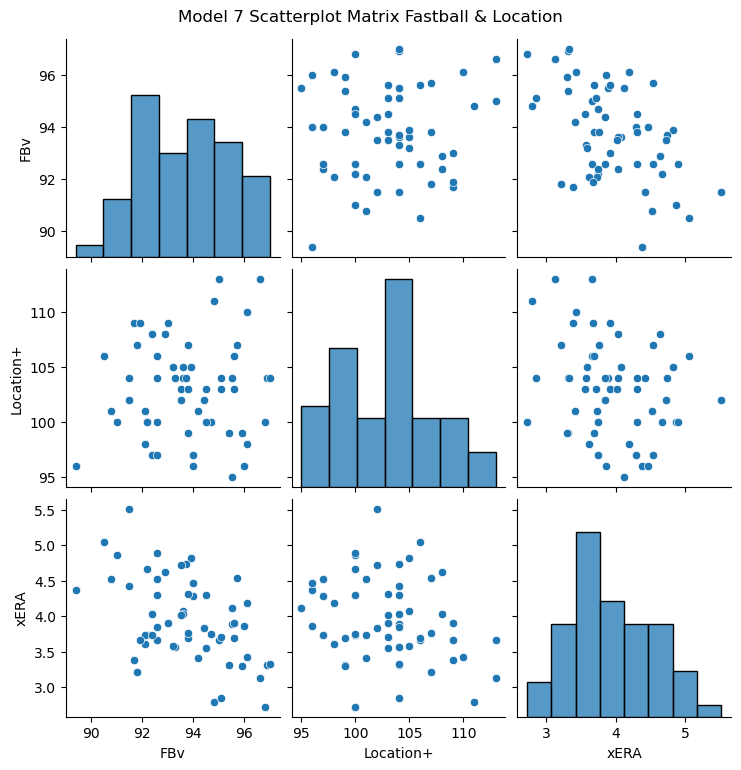

In [17]:
# Displaying a scatterplot matrix of Model 7
location_fb_df = location_fb_df.copy()
scat7 = sns.pairplot(location_fb_df)
scat7.fig.suptitle("Model 7 Scatterplot Matrix Fastball & Location", y=1.02)
plt.show()

In [14]:
# Finding outliers in the dataset
z_scores7 = np.abs(stats.zscore(location_fb_df))
z_score_df7 = pd.DataFrame(z_scores7, columns=location_fb_df.columns)
outliers7 = np.where((z_scores7 > 3).any(axis=1))[0]
print('Outliers:', outliers7)
print('Number of outliers:', len(outliers7))

Outliers: []
Number of outliers: 0


In [13]:
# Finding high influence values
influence7 = results7.get_influence()
(c7, p7) = influence7.cooks_distance
high_influence7_df = pd.DataFrame()
high_influence7_df['cooks_d'] = c7
high_influence7_df['leverage'] = influence7.hat_matrix_diag
n7 = len(high_influence7_df)
threshold7 = 2 / n7
high_influence7_df['high_influence'] = high_influence7_df['cooks_d'] > threshold7
high_influence_indices7 = np.where(high_influence7_df['high_influence'])[0]
print(location_fb_df.loc[high_influence_indices7])
print()
print(high_influence7_df.head())

     FBv  Location+  xERA
0   94.8        111  2.79
1   96.8        100  2.72
24  91.7        109  3.38
27  92.1         98  3.61
29  91.8        107  3.21
43  95.7        107  4.54
47  91.5        102  5.52
49  89.4         96  4.37
51  90.5        106  5.05

    cooks_d  leverage  high_influence
0  0.072355  0.080899            True
1  0.087440  0.082224            True
2  0.028378  0.028145           False
3  0.017508  0.050472           False
4  0.015521  0.037736           False


In [12]:
# Removing high influence values
location_fb_df77 = location_fb_df
location_fb_df77 = location_fb_df77.drop(high_influence_indices7)
print(location_fb_df77.shape)
location_fb_df77.head()

(49, 3)


,FBv,Location+,xERA
2,95.1,104,2.85
3,95.4,99,3.31
4,92.2,100,3.74
5,96.9,104,3.31
6,94.5,103,3.55


In [11]:
# Model 7 without high influence values
x77 = MS(location_fb_df77[['FBv','Location+']]).fit_transform(location_fb_df77)
y77 = location_fb_df77[['xERA']]
model77 = sm.OLS(y77, x77)
results77 = model77.fit()
results77.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     12.03
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           6.29e-05
Time:                        11:20:11   Log-Likelihood:                -23.980
No. Observations:                  49   AIC:                             53.96
Df Residuals:                      46   BIC:                             59.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.3879      3.773      5.934      0.000      14.793      29.983
FBv           -0.1649      0.038     -4.352      0.000      -0.241      -0.089
Location+     -0.0286      0.014     -2.028      0.048      -0.057      -0.000
==============================================================================
Omnibus:                        0.151   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.335
Skew:                           0.091   Prob(JB):                        0.846
Kurtosis:                       2.639   Cond. No.                     9.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 8: Inverse xERA
* Performing an inverse transformation on xERA to examine if the model performs better or worse.

In [29]:
inv_xera_fb_loc_df = location_fb_df
inv_xera_fb_loc_df['inv_xera'] = 1 / inv_xera_fb_loc_df['xERA']
x8 = MS(inv_xera_fb_loc_df[['FBv', 'Location+']]).fit_transform(inv_xera_fb_loc_df)
y8 = inv_xera_fb_loc_df[['inv_xera']]
model8 = sm.OLS(y8, x8)
results8 = model8.fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inv_xera   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.32
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.64e-05
Time:                        11:30:52   Log-Likelihood:                 115.68
No. Observations:                  58   AIC:                            -225.4
Df Residuals:                      55   BIC:                            -219.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9472      0.254     -3.724      0.000      -1.457      -0.438
FBv            0.0106      0.003      4.150      0.000       0.005       0.016
Location+      0.0021      0.001      2.002      0.050   -2.13e-06       0.004
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.958
Skew:                           0.449   Prob(JB):                        0.376
Kurtosis:                       2.935   Cond. No.                     7.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

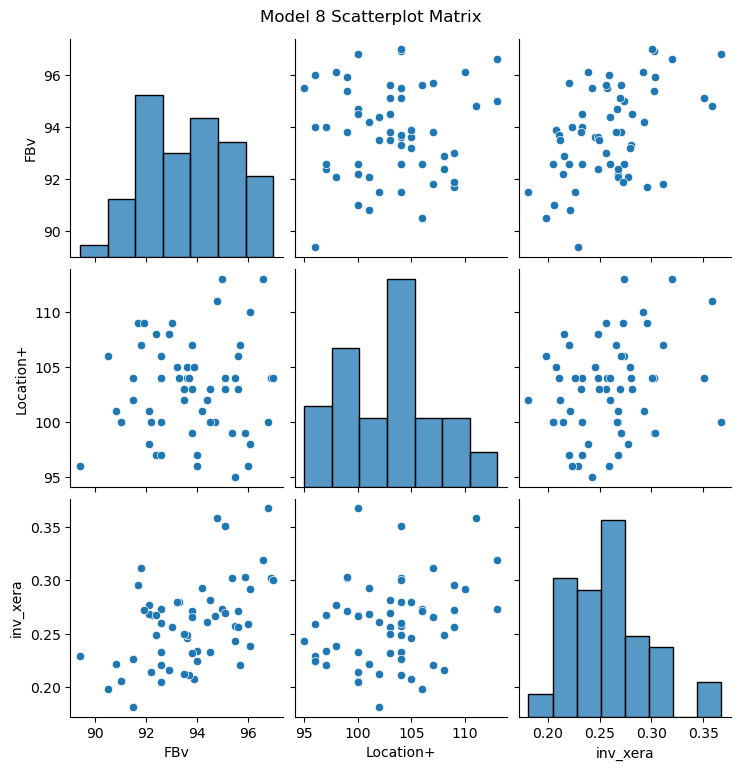

In [30]:
# Displaying a scatterplot matrix of Model 8
inv_xera_fb_loc_df = inv_xera_fb_loc_df.drop('xERA', axis=1)
inv_xera_fb_loc_df = inv_xera_fb_loc_df.copy()
scat8 = sns.pairplot(inv_xera_fb_loc_df)
scat8.fig.suptitle("Model 8 Scatterplot Matrix", y=1.02)
plt.show()

In [27]:
# Finding outliers in the dataset
z_scores8 = np.abs(stats.zscore(inv_xera_fb_loc_df))
z_score_df8 = pd.DataFrame(z_scores8, columns=inv_xera_fb_loc_df.columns)
outliers8 = np.where((z_scores8 > 3).any(axis=1))[0]
print('Outliers:', outliers8)
print('Number of outliers:', len(outliers8))

Outliers: []
Number of outliers: 0


In [26]:
# Finding high influence values
influence8 = results8.get_influence()
(c8, p8) = influence8.cooks_distance
high_influence8_df = pd.DataFrame()
high_influence8_df['cooks_d'] = c8
high_influence8_df['leverage'] = influence8.hat_matrix_diag
n8 = len(high_influence8_df)
threshold8 = 2 / n8
high_influence8_df['high_influence'] = high_influence8_df['cooks_d'] > threshold8
high_influence_indices8 = np.where(high_influence8_df['high_influence'])[0]
print(inv_xera_fb_loc_df.loc[high_influence_indices8])
print()
print(high_influence8_df.head())

     FBv  Location+  inv_xera
0   94.8        111  0.358423
1   96.8        100  0.367647
2   95.1        104  0.350877
24  91.7        109  0.295858
27  92.1         98  0.277008
29  91.8        107  0.311526
43  95.7        107  0.220264
47  91.5        102  0.181159
49  89.4         96  0.228833

    cooks_d  leverage  high_influence
0  0.143197  0.080899            True
1  0.194117  0.082224            True
2  0.049486  0.028145            True
3  0.018813  0.050472           False
4  0.011408  0.037736           False


In [25]:
# Removing high influence values
inv_xera_fb_loc_df88 = inv_xera_fb_loc_df
inv_xera_fb_loc_df88 = inv_xera_fb_loc_df88.drop(high_influence_indices8)
print(inv_xera_fb_loc_df88.shape)
inv_xera_fb_loc_df88.head()

(49, 3)


,FBv,Location+,inv_xera
3,95.4,99,0.302115
4,92.2,100,0.267380
5,96.9,104,0.302115
6,94.5,103,0.281690
7,92.6,104,0.232558


In [24]:
# Model 8 without high influence values
x88 = MS(inv_xera_fb_loc_df88[['FBv', 'Location+']]).fit_transform(inv_xera_fb_loc_df88)
y88 = inv_xera_fb_loc_df88[['inv_xera']]
model88 = sm.OLS(y88, x88)
results88 = model88.fit()
results88.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inv_xera   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     15.22
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           8.43e-06
Time:                        11:30:05   Log-Likelihood:                 114.60
No. Observations:                  49   AIC:                            -223.2
Df Residuals:                      46   BIC:                            -217.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9474      0.218     -4.352      0.000      -1.386      -0.509
FBv            0.0109      0.002      5.088      0.000       0.007       0.015
Location+      0.0017      0.001      2.067      0.044    4.47e-05       0.003
==============================================================================
Omnibus:                        2.063   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.281
Skew:                           0.022   Prob(JB):                        0.527
Kurtosis:                       2.209   Cond. No.                     8.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion
* Adding location to the regression model improved the model without adding any of the regression pitfalls. Also, location was a significant predictor variable alonside fastball velocity.